## 特征提取

### 时域特征

#### 音频能量

In [1]:
import librosa
# 加载音频文件
audio_path = 'data/lijunjie/1.wav'
x, sr = librosa.load(audio_path)
# 计算音频信号的能量
energy = sum(x**2) / len(x)
print(f"音频能量：{energy}")

音频能量：4.2505971936445663e-07


### 频域特征

#### MFCC

In [3]:
import librosa
# 加载音频文件
audio_path = 'data/lijunjie/1.wav'
x, sr = librosa.load(audio_path)
# 提取MFCC特征
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
print(f"MFCC特征的形状：{mfccs.shape}")

MFCC特征的形状：(13, 302)


### 时频域分析

#### 小波系数

In [4]:
import numpy as np
import librosa
import pywt
import matplotlib.pyplot as plt

In [5]:
# 读取音频文件
audio, sr = librosa.load('std.wav', sr=None)

In [6]:
# 定义小波基名称（例如，'db4'）
wavelet_name = 'db4'

# 使用指定小波基进行4级小波分解
coeffs = pywt.wavedec(audio, wavelet_name, level=4)

# 绘制原始信号图像
plt.figure(figsize=(8, 6))
plt.subplot(5, 1, 1)
plt.plot(audio)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 绘制小波系数图像
for i in range(1, len(coeffs)):
    plt.subplot(5, 1, i+1)
    plt.plot(coeffs[i])
    plt.title(f'Wavelet Coefficients - Level {i}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

#### 能量特征

In [8]:
import numpy as np
import pywt

# 假设你已经有一个名为'coeffs'的小波系数序列
# 计算每个系数序列的能量
energy_features = [np.sum(np.square(coeff)) for coeff in coeffs]

# 现在，energy_features就是你的特征向量
print("能量特征向量:", energy_features)

能量特征向量: [0.3696609, 0.0004383094, 1.0426533e-05, 6.39732e-06, 1.1952901e-05]


#### 频率特征

In [13]:
# 假设你有两个小波系数序列：high_coeffs和low_coeffs
high_coeffs = coeffs[1]
low_coeffs = coeffs[0]
# 计算高频部分与低频部分的比值
frequency_ratio = np.divide(high_coeffs, low_coeffs)

# 现在，frequency_ratio就是你的特征向量
print("频率特征向量:", frequency_ratio)

频率特征向量: [-0.00020363 -0.00325214 -0.04070048 ...  0.04114281  0.09025304
 -0.01811493]


#### 时频特征

##### 高频特征预览

[-1.4047241e-05 -4.4548466e-05  1.8487042e-05 ... -4.6965171e-05
  2.4626548e-05 -1.4014107e-05]


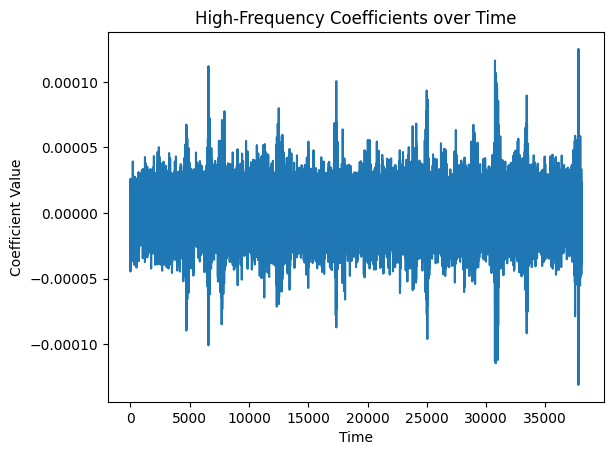

In [14]:
# 假设你有一个小波系数序列：coeffs
# 选择某个频率范围（例如高频部分）
selected_coeffs = coeffs[2]  # 假设这是高频部分的系数
# print(coeffs[2])

# 绘制该系数随时间的变化
import matplotlib.pyplot as plt
plt.plot(selected_coeffs)
plt.title("High-Frequency Coefficients over Time")
plt.xlabel("Time")
plt.ylabel("Coefficient Value")
plt.show()

##### 单音频操作

In [15]:
import os
import pandas as pd
import numpy as np
import pywt
from scipy.io import wavfile

audio_path = 'test/6.wav'
# 读取音频文件
rate, wavsignal = wavfile.read(audio_path)

# 进行小波变换
wavelet_name = 'db4'
coeffs = pywt.wavedec(wavsignal, wavelet_name, level=4)

# 获取高频部分的系数（假设这是第二个尺度的高频部分）
high_coeffs = coeffs[2]

# 提取时频特征（例如能量、均值等）
feature_vector = [np.sum(np.square(high_coeffs)), np.mean(high_coeffs), np.std(high_coeffs)]

print(feature_vector)

[11649.518351516865, 0.003975687329920455, 0.6500447161176752]


##### 批量操作

## 生成特征向量

In [8]:
import os
import pandas as pd
import librosa

wav_filepath = 'std.wav'

x, sr = librosa.load(wav_filepath)
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
energy = sum(x**2) / len(x)  # 计算能量
feature_vector = mfccs.flatten().tolist() + [energy]

# print(feature_vector)

In [6]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
        energy = sum(x**2) / len(x)  # 计算能量
        feature_vector = mfccs.flatten().tolist() + [energy]
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'features_and_labels.csv'
df.to_csv(output_csv, index=False)

print(f"特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\3249559179.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pand

特征向量和标签已保存到 features_and_labels.csv 中。


In [10]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)  # 选择13个MFCC系数
        feature_vector = mfccs.flatten().tolist()
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'mfcc.csv'
df.to_csv(output_csv, index=False)

print(f"特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\2807822913.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand

特征向量和标签已保存到 mfcc.csv 中。


In [11]:
import os
import pandas as pd
import librosa

# 文件夹路径
data_folder = 'data'
full_folder = os.path.join(data_folder, 'full')
labels_csv = os.path.join(full_folder, 'labels.csv')

# 创建空的DataFrame来存储特征向量和标签
df = pd.DataFrame(columns=['feature', 'label'])

# 遍历labels.csv中的每一行
with open(labels_csv, 'r') as f:
    for line in f:
        label, wav_filepath = line.strip().split(' ')
        x, sr = librosa.load(wav_filepath)
        energy = sum(x**2) / len(x)  # 计算能量
        feature_vector = [energy]
        df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)

# 保存到CSV文件
output_csv = 'energy.csv'
df.to_csv(output_csv, index=False)

print(f"只包含能量特征的特征向量和标签已保存到 {output_csv} 中。")

C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand

只包含能量特征的特征向量和标签已保存到 energy.csv 中。


C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'feature': feature_vector, 'label': label}, ignore_index=True)
C:\Users\86180\AppData\Local\Temp\ipykernel_119224\4039469726.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pand